In [1]:
# Student Name: Tony Yang (1003289229)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene
%pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.1 MB/s eta 0:00:00


In [2]:
# Load the dataframe
df = pd.read_csv("INF2178_A4_data.csv")

In [3]:
# Preview first 5 rows
df.head(5)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [4]:
# Check Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [5]:
# Check missing values
df.isnull().sum()

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
# Extract interested columns
df= df[['Subject ID','Group','Visit','eTIV','nWBV']]

In [7]:
# Summary statistics
df.describe()

,Visit,eTIV,nWBV
count,294.000000,294.000000,294.000000
mean,1.489796,1478.853741,0.731381
std,0.500748,176.559755,0.037373
min,1.000000,1106.000000,0.646000
25%,1.000000,1347.250000,0.703000
50%,1.000000,1461.500000,0.732000
75%,2.000000,1569.000000,0.756000
max,2.000000,2004.000000,0.837000


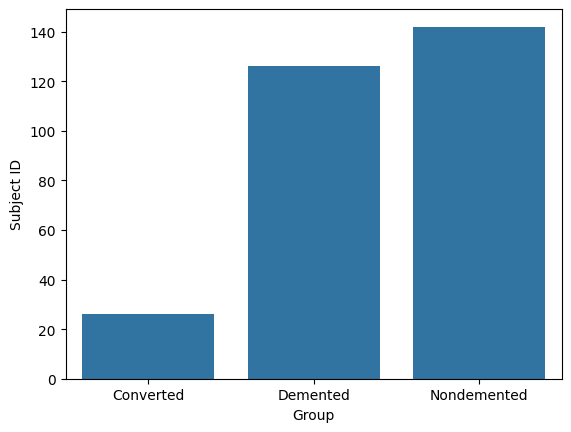

In [8]:
# Construct new dataframe of 'subject id' group by 'Group' and plot it
new_df = df.groupby('Group')['Subject ID'].count().reset_index()
sns.barplot(data = new_df,x='Group',y='Subject ID')
plt.show()

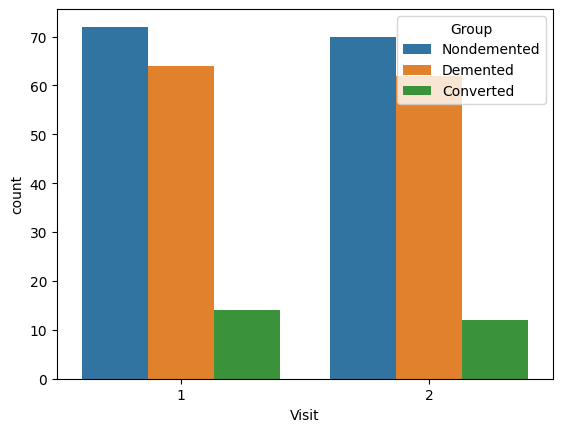

In [9]:
# Count plot for visit based on different groups
sns.countplot(data = df,x='Visit',hue ='Group')
plt.show()

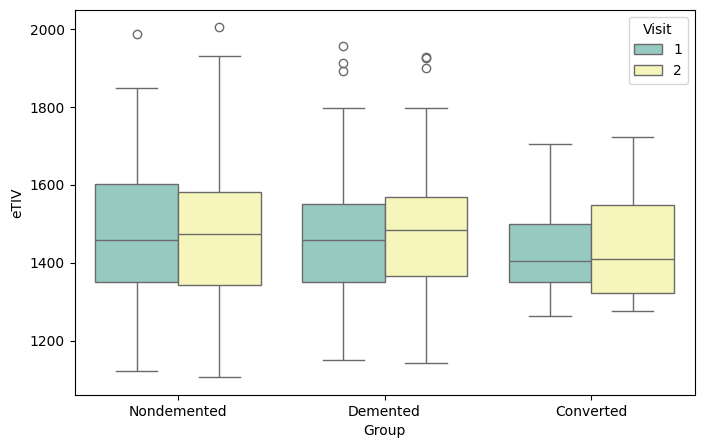

In [10]:
# Boxplot for eTIV across different Group and visit
plt.figure(figsize=(8, 5))
sns.boxplot(x="Group", y="eTIV", hue="Visit", data=df, palette="Set3")
plt.xlabel("Group")
plt.ylabel("eTIV")
plt.show()



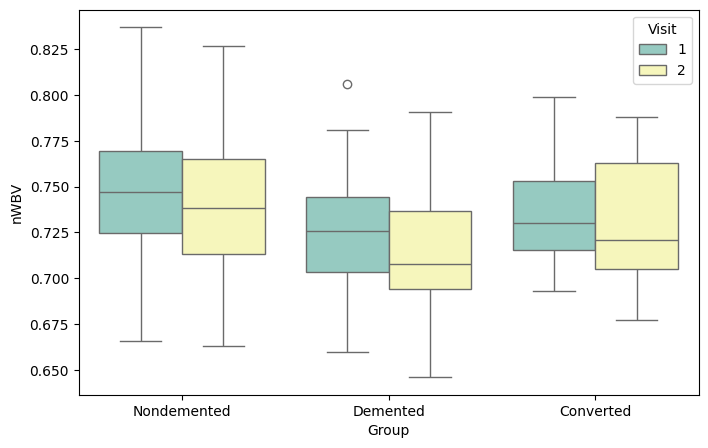

In [11]:
# Boxplot for nWBV across different Group and visit
plt.figure(figsize=(8, 5))
sns.boxplot(x="Group", y="nWBV", hue="Visit", data=df, palette="Set3")
plt.xlabel("Group")
plt.ylabel("nWBV")
plt.show()

**Research Question 1:**

<Axes: xlabel='Group', ylabel='eTIV'>

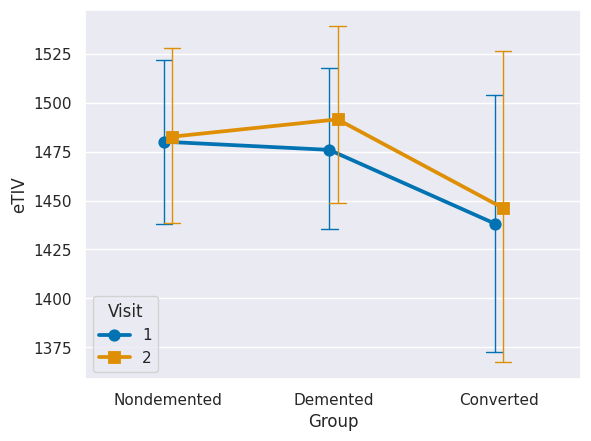

In [12]:
# Create the point plot
sns.set()
sns.pointplot(data=df, x="Group", y="eTIV", hue="Visit", dodge=True, markers=["o", "s"],capsize=.1, err_kws={'linewidth': 1}, palette="colorblind")

In [13]:
# Perform mixed-effect ANOVA
res = pg.mixed_anova(data=df, dv="eTIV", between="Group", within="Visit", subject="Subject ID")
res


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,37424.708356,2,141,18712.354178,0.297278,0.743302,0.004199,NaN
1,Visit,5573.920139,1,141,5573.920139,9.224900,0.002845,0.061407,1.0
2,Interaction,1004.783164,2,141,502.391582,0.831464,0.437535,0.011656,NaN


In [14]:
# Assumption 1 - mauchly's test of spericity
pg.sphericity(data=df, dv='eTIV', subject='Subject ID', within='Visit')[-1]

1.0

In [15]:
# Assumption 2 - test of normality Shapiro-Wilk test
# String Converstion for Group and Visit
df['Group'] = df['Group'].astype(str)
df['Visit'] = df['Visit'].astype(str)

df["group_visit"] = df["Group"] + "-" + df["Visit"]
pg.normality(df, dv="eTIV", group = "group_visit")

,W,pval,normal
group_visit,,,
Nondemented-1,0.968937,0.071927,True
Nondemented-2,0.975840,0.194094,True
Demented-1,0.963033,0.052404,True
Demented-2,0.971023,0.149651,True
Converted-1,0.934993,0.357941,True
Converted-2,0.915798,0.252988,True


In [16]:
# Assumption 3 - Homogeneity Levene's Test for visit = 1 and 2
print("Visit = 1 :")
print(pg.homoscedasticity(df[df['Visit'] == "1"], dv="eTIV", group="Group"))
print("Visit = 2 :")
print(pg.homoscedasticity(df[df['Visit'] == "2"], dv="eTIV", group="Group"))

Visit = 1 :
               W      pval  equal_var
levene  0.942689  0.391921       True
Visit = 2 :
               W      pval  equal_var
levene  0.405672  0.667304       True


**Research Question 2:**

<Axes: xlabel='Group', ylabel='nWBV'>

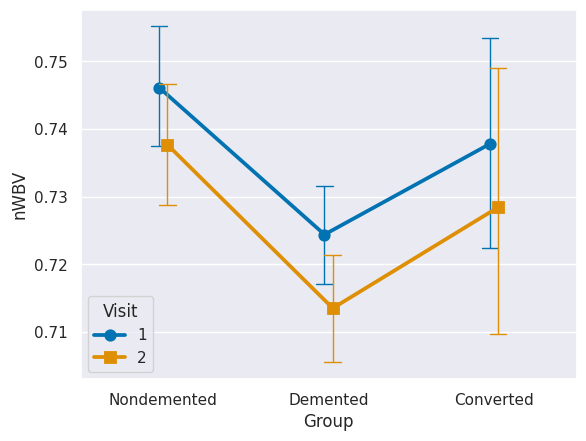

In [17]:
# Create the point plot
sns.set()
sns.pointplot(data=df, x="Group", y="nWBV", hue="Visit", dodge=True, markers=["o", "s"],capsize=.1, err_kws={'linewidth': 1}, palette="colorblind")

In [18]:
# Perform mixed-effect ANOVA
res = pg.mixed_anova(data=df, dv="nWBV", between="Group", within="Visit", subject="Subject ID")
res

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.033640,2,141,0.016820,6.712381,1.642113e-03,0.086934,NaN
1,Visit,0.006508,1,141,0.006508,94.251225,2.226896e-17,0.400641,1.0
2,Interaction,0.000212,2,141,0.000106,1.533508,2.193542e-01,0.021289,NaN


In [19]:
# Assumption 1 - mauchly's test of spericity
pg.sphericity(data=df, dv='nWBV', subject='Subject ID', within='Visit')[-1]

1.0

In [20]:
# Assumption 2 - test of normality
pg.normality(df, dv="nWBV", group = "group_visit")

,W,pval,normal
group_visit,,,
Nondemented-1,0.988723,0.771999,True
Nondemented-2,0.983956,0.510883,True
Demented-1,0.992007,0.954626,True
Demented-2,0.979475,0.384691,True
Converted-1,0.933507,0.341468,True
Converted-2,0.940329,0.502351,True


In [21]:
# Assumption 3 - Homogeneity Levene's Test for visit = 1 and 2
print("Visit = 1 :")
print(pg.homoscedasticity(df[df['Visit'] == "1"], dv="nWBV", group="Group"))
print("Visit = 2 :")
print(pg.homoscedasticity(df[df['Visit'] == "2"], dv="nWBV", group="Group"))

Visit = 1 :
               W     pval  equal_var
levene  1.045199  0.35422       True
Visit = 2 :
               W      pval  equal_var
levene  0.298582  0.742338       True


Required Sample Size: 45.45073088568012


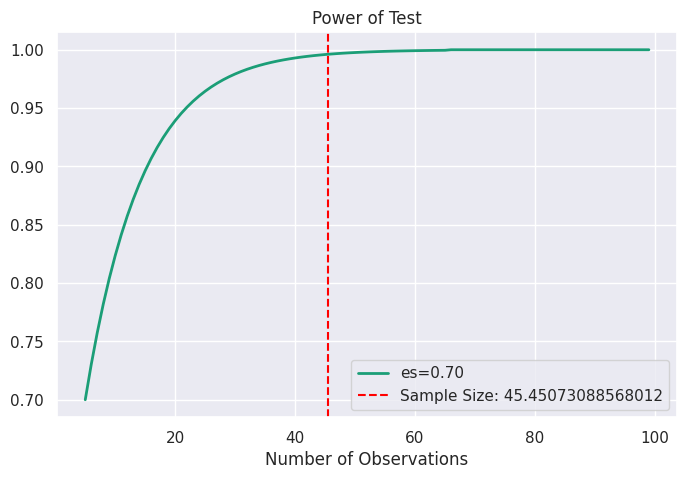

In [22]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
# Calculate the required sample size
obj = TTestIndPower()
sample_size = obj.solve_power(effect_size=0.7, power=0.91, alpha=0.05)
# Print the result
print("Required Sample Size:", sample_size)

# Visualize the power analysis
fig, ax = plt.subplots(figsize=(8, 5))
obj.plot_power(dep_var='nobs',
                          nobs=np.array(range(5, 100)),
                          effect_size=np.array([0.7]),
                          alpha=0.5,
                          ax=ax)
plt.axvline(x=sample_size, linestyle='--', color='red', label = 'Sample Size: {}'.format(sample_size))
plt.legend()
plt.show()
